In [1]:
# N is the size of population and te is the number of realization of simulation.

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math

N=50
te=100000

# Some parameters must be specified before the calculation starts. Without losing generality, the payoff matrix of RSP game can be written as 
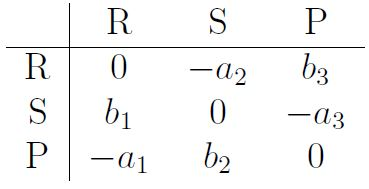

# So we should determine parameters a_i and b_i.
# Also, the constan eps which determines the probability of mutation should be quantiied.

In [398]:
b1=1/2
b2=3
b3=2/3
a1=1
a2=1
a3=1


eps=.01

def toz(x):
    if x<0:
        return(eps)
    else:
        return(x+eps)


def pof(N,w1,w2):
    return((-b1*w2+a3*(N-w1-w2))/N,(a1*w1-b2*(N-w1-w2))/N,(-b3*w1+a2*w2)/N)

In [399]:
def fix(N,w1,w2,gam):
    t=0
    while   t<gam:

        p=random.random()
        
        if w1==0 and w2==0:
            w2=w2+1
            t=t+1
            
        elif w1==0 and N-w2==0:
            w1=w1+1
            w2=w2-1
            t=t+1
            
        elif w2==0 and N-w1==0:
            w1=w1-1
            t=t+1
        
        elif w1==0 and w2!=0 and N-w1-w2!=0:
            t=t+1
            q2=toz(pof(N,w1,w2)[2]-pof(N,w1,w2)[0])
            q3=toz(pof(N,w1,w2)[1]-pof(N,w1,w2)[2])
            q4=toz(pof(N,w1,w2)[2]-pof(N,w1,w2)[1])
            q5=toz(pof(N,w1,w2)[1]-pof(N,w1,w2)[0])
            qt=q2+q3+q4+q5
            
            if 0<p<q2/qt:
                w1=w1+1
            elif q2/qt<p<(q2+q3)/qt:
                w2=w2-1
            elif (q2+q3)/qt<p<(q2+q3+q4)/qt:
                w2=w2+1
            else:
                w1=w1+1
                w2=w2-1
            
            
        elif N-w1-w2==0 and w1!=0 and w2!=0:
            t=t+1
            Z1=toz(pof(N,w1,w2)[0]-pof(N,w1,w2)[2])
            Z2=toz(pof(N,w1,w2)[1]-pof(N,w1,w2)[2])
            Z3=toz(pof(N,w1,w2)[0]-pof(N,w1,w2)[1])
            Z4=toz(pof(N,w1,w2)[1]-pof(N,w1,w2)[0])
            Zt=Z1+Z2+Z3+Z4
            
            if 0<p<Z1/Zt:
                w1=w1-1
            elif Z1/Zt<p<(Z1+Z2)/Zt:
                w2=w2-1
            elif (Z2+Z1)/Zt<p<(Z2+Z3+Z1)/Zt:
                w2=w2+1
                w1=w1-1
            else:
                w1=w1+1
                w2=w2-1
                
        elif w2==0 and w1!=0 and N-w1-w2!=0:
            t=t+1
            y1=toz(pof(N,w1,w2)[0]-pof(N,w1,w2)[1])
            y2=toz(pof(N,w1,w2)[2]-pof(N,w1,w2)[1])
            y3=toz(pof(N,w1,w2)[2]-pof(N,w1,w2)[0])
            y4=toz(pof(N,w1,w2)[0]-pof(N,w1,w2)[2])
            yt=y4+y2+y3+y1
            
            if 0<p<y1/yt:
                w1=w1-1
                w2=w2+1
            elif y1/yt<p<(y1+y2)/yt:
                w2=w2+1
            elif (y1+y2)/yt<p<(y2+y3+y1)/yt:
                w1=w1+1
            else:
                w1=w1-1
                
        else:   

            h1=toz(pof(N,w1,w2)[0]-pof(N,w1,w2)[2])
            h2=toz(pof(N,w1,w2)[2]-pof(N,w1,w2)[0])
            h3=toz(pof(N,w1,w2)[1]-pof(N,w1,w2)[2])
            h4=toz(pof(N,w1,w2)[2]-pof(N,w1,w2)[1])
            h5=toz(pof(N,w1,w2)[1]-pof(N,w1,w2)[0])
            h6=toz(pof(N,w1,w2)[0]-pof(N,w1,w2)[1])
            h7=h1+h2+h3+h4+h5+h6


            if 0<p<h1/h7:
                w1=w1-1
                t=t+1
            elif h1/h7<p<(h1+h2)/h7:
                w1=w1+1
                t=t+1
            elif (h1+h2)/h7<p<(h1+h2+h3)/h7:
                w2=w2-1
                t=t+1
            elif (h1+h2+h3)/h7<p<(h1+h2+h3+h4)/h7:
                w2=w2+1
                t=t+1
            elif (h1+h2+h3+h4)/h7<p<(h1+h2+h3+h4+h5)/h7:
                w1=w1+1
                w2=w2-1
                t=t+1
            elif (h1+h2+h3+h4+h5)/h7<p<(h1+h2+h3+h4+h5+h6)/h7:
                w1=w1-1
                w2=w2+1
                t=t+1

        
    return(w1,w2,N-w1-w2)


In [400]:
def STB1(N):
    SE=np.zeros(int((N+1)*(N+2)/2))
    ai=fix(N,int(N/3),int(N/3),1000)
    T=0
    for x in range (0,N+1):
        for y in range (0,x+1):
            if ai[0]==y and ai[1]==N-x:
                SE[T]=1
        
            T=T+1
    return(SE)

In [401]:
def STBN(N,te):
    A=STB1(N)
    for k in range (te):
        A=A+STB1(N)
    return(A/te)
        
    

In [402]:
TI=STBN(N,te)
TII=np.zeros(len(TI))
TII[0]=TI[0]
TII[1]=TI[int(N*(N+1)/2)]
TII[2]=TI[int((N+2)*(N+1)/2)-1]
for x in range (1,int(N*(N+1)/2)-1):
    TII[x+2]=TI[x]
for x in range (int(N*(N+1)/2)+1,int((N+2)*(N+1)/2)-1):
    TII[x+1]=TI[x] 

JKL=TII
def reyt(x):
    if x==1:
        return([JKL[0]])
    if x==N+1:
        GH=[JKL[1]]
        for s in range (int(x*(x-1)//2+2),len(JKL)):
            GH.append(JKL[s])
        GH.append(JKL[2])
        return(GH)
        
    ui=[]
    for j in range (int(x*(x+1)//2-x+2),int(x*(x+1)//2+2)):
        ui.append(JKL[j])
    return(ui)


ERt=np.zeros((N+2,2*N+1))
for i in range (0,N+2):
    for j in range (0,2*N+1):
        ERt[i][j]='nan'
for j in range (1,N+2):
    for k in range (0, len(reyt(j))):
        ERt[j-1][N-len(reyt(j))+2*k+1]=reyt(j)[k]

        
for x in range (0,N+1):
    for y in range (0,2*N-1):
        if str(ERt[x,y])=='nan' and str(ERt[x,y-1])!='nan' and str(ERt[x,y+1])!='nan':
            ERt[x,y]=ERt[x,y+1]            
ERt[N][2*N-1]=ERt[N][2*N] 

for x in range (0,N+1):
    for y in range (0,2*N+1):
        if ERt[x,y]==0:
            ERt[x,y]='nan'
ERt[N][0]=0



In [403]:
for x in range (0,np.shape(ERt)[0]-1):
    for y in range (0,np.shape(ERt)[1]):
        if str(ERt[x,y])=='nan' and y<x+len(ERt)-1 and y>-x+len(ERt)-3 :
            ERt[x,y]=0


<ipython-input-404-a2a27ce82819>:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dbi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('N=50-sime-ergodic-nonsym1-.pdf',dbi=1000)
<ipython-input-404-a2a27ce82819>:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dbi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Sim-50-nonsym-erg1.pdf',dbi=1000)


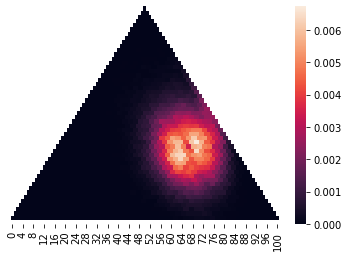

In [404]:
ax = sns.heatmap(ERt,yticklabels=False,xticklabels=False)
